In [72]:
import import_files as MrtRecommendationDependencies
from ridership_transformer import RidershipTransformer
from ridership_cleaner import RidershipCleaner
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import classification_report

In [103]:
ds = pd.read_csv(MrtRecommendationDependencies.get_dataset_path("train_updates_with_ridership.csv"))

In [125]:
train_updates_with_ridership = pd.DataFrame()
train_updates = pd.read_csv(MrtRecommendationDependencies.get_dataset_path("train_status.csv"),parse_dates=['datetime'])
for station in stations:
    transformed_df = pd.read_csv(MrtRecommendationDependencies.get_dataset_path(f"{station}_weather_transformed.csv"),parse_dates=["datetime"])
    temp_df = train_updates.merge(transformed_df, left_on="datetime", right_on="datetime", how="right")
    temp_df = temp_df[temp_df['headway']>0]
    temp_df['hour_of_day'] = temp_df.apply(lambda x: x.datetime.hour, axis=1)
    temp_df['day_of_week'] = temp_df.apply(lambda x: x.datetime.weekday(), axis=1)
    train_updates_with_ridership = train_updates_with_ridership.append(temp_df,ignore_index=True)

In [126]:
ds = train_updates_with_ridership.drop(['datetime', 'weather_main', 'num_dalian_train_running', 'num_dalian_train_operational', 'hour_of_day', 'day_of_week'], axis=1)

In [127]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ds)
pca = PCA(n_components=2)
pca_ds = pd.DataFrame(data=pca.fit_transform(scaled_data), columns=["PCA1", "PCA2"])
cluster = KMeans(n_clusters=3).fit(pca_ds).labels_

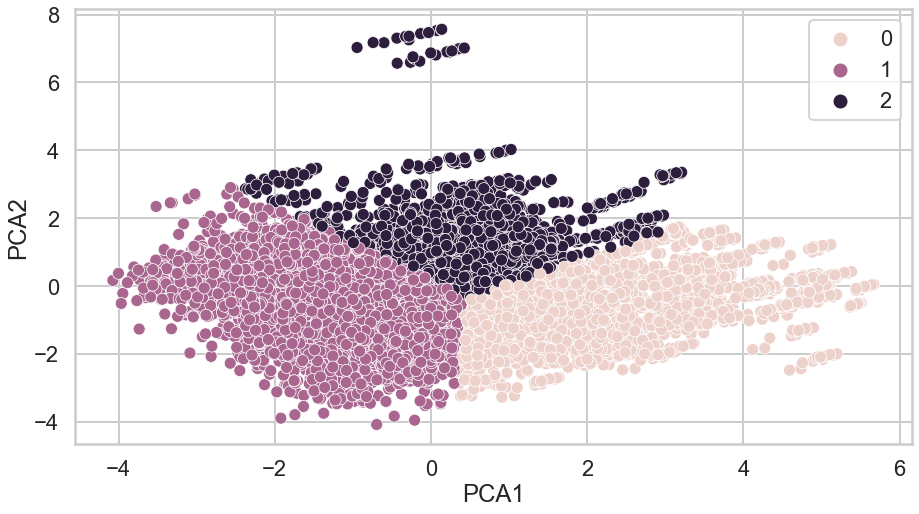

In [128]:
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(ax = ax, x=pca_ds.PCA1, y=pca_ds.PCA2, hue=cluster)

In [129]:
ds['labels'] = cluster
train_updates_with_ridership['labels'] = cluster

In [130]:
ds[ds.labels == 0].head(20)

,num_train_running,num_train_operational,headway,entry,exit,temp,humidity,rain_1h,rain_3h,labels
1,8.0,8.0,8.0,2752.0,2.0,31.29,60,0.00,0.0,0
2,7.0,7.0,8.0,2773.0,0.0,30.09,66,0.00,0.0,0
4,9.0,9.0,8.0,3013.0,3.0,31.24,60,0.00,0.0,0
7,8.0,8.0,8.0,2868.0,0.0,30.99,59,0.00,0.0,0
9,8.0,8.0,8.0,1437.0,0.0,30.69,62,0.00,0.0,0
11,12.0,13.0,8.5,984.0,232.0,29.14,67,0.00,0.0,0
14,8.0,8.0,8.0,2704.0,0.0,29.15,66,0.00,0.0,0
17,7.0,7.0,8.0,2884.0,2.0,28.77,76,1.35,0.0,0
19,9.0,9.0,8.0,2886.0,0.0,27.90,75,0.00,0.0,0
21,8.0,8.0,8.0,1387.0,4.0,28.43,78,0.58,0.0,0


In [100]:
train_updates_with_ridership.head(20)

,datetime,num_train_running,num_train_operational,num_dalian_train_running,num_dalian_train_operational,headway,entry,exit,temp,humidity,rain_1h,rain_3h,weather_main,hour_of_day,day_of_week,labels
0,2018-07-01 19:00:00,12.0,13.0,0.0,0.0,8.5,2410.0,3426.0,26.41,87,0.00,0.0,Haze,19,6,2
1,2018-07-02 05:00:00,8.0,8.0,0.0,0.0,8.0,2752.0,2.0,31.29,60,0.00,0.0,Haze,5,0,1
2,2018-07-03 05:00:00,7.0,7.0,0.0,0.0,8.0,2773.0,0.0,30.09,66,0.00,0.0,Haze,5,1,1
3,2018-07-02 18:00:00,15.0,15.0,0.0,0.0,7.0,2678.0,4303.0,27.23,84,0.00,0.0,Haze,18,0,0
4,2018-07-04 05:00:00,9.0,9.0,0.0,0.0,8.0,3013.0,3.0,31.24,60,0.00,0.0,Haze,5,2,1
5,2018-07-03 20:00:00,14.0,14.0,0.0,0.0,7.5,2201.0,2180.0,26.11,87,0.00,0.0,Haze,20,1,0
6,2018-07-05 06:00:00,14.0,14.0,0.0,0.0,7.5,4676.0,429.0,31.00,59,0.00,0.0,Haze,6,3,0
7,2018-07-05 05:00:00,8.0,8.0,0.0,0.0,8.0,2868.0,0.0,30.99,59,0.00,0.0,Haze,5,3,1
8,2018-07-06 07:00:00,15.0,15.0,0.0,0.0,7.0,2915.0,1006.0,29.65,62,0.00,0.0,Haze,7,4,0
9,2018-07-06 05:00:00,8.0,8.0,0.0,0.0,8.0,1437.0,0.0,30.69,62,0.00,0.0,Haze,5,4,1


In [154]:
train_updates_with_ridership[train_updates_with_ridership.labels == 0].head(40)

,datetime,num_train_running,num_train_operational,num_dalian_train_running,num_dalian_train_operational,headway,entry,exit,temp,humidity,rain_1h,rain_3h,weather_main,hour_of_day,day_of_week,labels
1,2018-07-02 05:00:00,8.0,8.0,0.0,0.0,8.0,2752.0,2.0,31.29,60,0.00,0.0,Haze,5,0,0
2,2018-07-03 05:00:00,7.0,7.0,0.0,0.0,8.0,2773.0,0.0,30.09,66,0.00,0.0,Haze,5,1,0
4,2018-07-04 05:00:00,9.0,9.0,0.0,0.0,8.0,3013.0,3.0,31.24,60,0.00,0.0,Haze,5,2,0
7,2018-07-05 05:00:00,8.0,8.0,0.0,0.0,8.0,2868.0,0.0,30.99,59,0.00,0.0,Haze,5,3,0
9,2018-07-06 05:00:00,8.0,8.0,0.0,0.0,8.0,1437.0,0.0,30.69,62,0.00,0.0,Haze,5,4,0
11,2018-07-07 06:00:00,12.0,13.0,0.0,0.0,8.5,984.0,232.0,29.14,67,0.00,0.0,Clouds,6,5,0
14,2018-07-09 05:00:00,8.0,8.0,0.0,0.0,8.0,2704.0,0.0,29.15,66,0.00,0.0,Haze,5,0,0
17,2018-07-11 05:00:00,7.0,7.0,0.0,0.0,8.0,2884.0,2.0,28.77,76,1.35,0.0,Rain,5,2,0
19,2018-07-12 05:00:00,9.0,9.0,0.0,0.0,8.0,2886.0,0.0,27.90,75,0.00,0.0,Clouds,5,3,0
21,2018-07-13 05:00:00,8.0,8.0,0.0,0.0,8.0,1387.0,4.0,28.43,78,0.58,0.0,Rain,5,4,0


In [144]:
print(train_updates_with_ridership[train_updates_with_ridership.labels == 0].headway.mean())
print(train_updates_with_ridership[train_updates_with_ridership.labels == 1].headway.mean())
print(train_updates_with_ridership[train_updates_with_ridership.labels == 2].headway.mean())

8.160057163272597
7.080177993527508
8.331950955643707


In [152]:
print(train_updates_with_ridership[train_updates_with_ridership.labels == 0].hour_of_day.value_counts().sort_index())
print(train_updates_with_ridership[train_updates_with_ridership.labels == 1].hour_of_day.value_counts().sort_index())
print(train_updates_with_ridership[train_updates_with_ridership.labels == 2].hour_of_day.value_counts().sort_index())

5     1260
6      511
7      274
8      113
9       61
10     313
11     132
12      85
13      26
14       4
15       8
18      12
Name: hour_of_day, dtype: int64
5     100
6     705
7     639
8     339
9     267
10    433
11    650
12    706
13    258
14    168
15    118
16    203
17    378
18    370
19    357
20    425
21     64
Name: hour_of_day, dtype: int64
5     109
6     110
7      62
8      94
9      36
10    255
11    401
12    418
13    197
14    101
15     69
16    187
17    142
18    190
19    228
20    173
21      1
Name: hour_of_day, dtype: int64


In [156]:
train_updates_with_ridership.loc[train_updates_with_ridership.labels == 0, 'recommendation'] = 'avoid'
train_updates_with_ridership.loc[train_updates_with_ridership.labels == 1, 'recommendation'] = 'take'
train_updates_with_ridership.loc[train_updates_with_ridership.labels == 2, 'recommendation'] = 'take with caution'

In [159]:
train_updates_with_ridership.drop(['datetime','weather_main','labels','num_dalian_train_running','num_dalian_train_operational'], axis=1)

,num_train_running,num_train_operational,headway,entry,exit,temp,humidity,rain_1h,rain_3h,hour_of_day,day_of_week,recommendation
0,12.0,13.0,8.5,2410.0,3426.0,26.41,87,0.00,0.0,19,6,take with caution
1,8.0,8.0,8.0,2752.0,2.0,31.29,60,0.00,0.0,5,0,avoid
2,7.0,7.0,8.0,2773.0,0.0,30.09,66,0.00,0.0,5,1,avoid
3,15.0,15.0,7.0,2678.0,4303.0,27.23,84,0.00,0.0,18,0,take
4,9.0,9.0,8.0,3013.0,3.0,31.24,60,0.00,0.0,5,2,avoid
...,...,...,...,...,...,...,...,...,...,...,...,...
11747,12.0,12.0,8.5,3213.0,3155.0,25.98,89,0.67,0.0,13,5,take with caution
11748,12.0,12.0,8.5,2615.0,1812.0,26.19,89,0.70,0.0,12,5,take with caution
11749,12.0,13.0,8.5,2423.0,1991.0,26.57,92,0.25,0.0,17,6,take with caution
11750,12.0,12.0,8.5,2103.0,1990.0,26.25,92,0.56,0.0,18,6,take with caution


In [160]:
file = MrtRecommendationDependencies.get_dataset_path("trip_classes.csv")

In [161]:
train_updates_with_ridership.to_csv(file,index=False)